In [5]:
using Distributions, LinearAlgebra, Random, Measures, Plots; gr()

weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

12-element Array{Float64,1}:
 158.0
 164.2
 160.3
 159.9
 162.1
 164.6
 169.6
 167.4
 166.4
 171.0
 171.2
 172.6

In [6]:
using Printf

time_step = 1.0  # day
scale_factor = 4.0/10

function g_h_filter(data, x0, dx, g, h, dt)
    estimates, predictions = [], []

    x_est = x0
    for z in data
        # prediction step
        x_pred = x_est + dx*dt
        append!(predictions, x_pred)
        dx = dx
        
        # update step
        residual = z - x_pred
        dx = dx + h*residual/dt
        x_est = x_pred + g*residual
        append!(estimates, x_est)

        @printf("%f, %f, %f, %f\n", x_est, x_pred, z, dx)
    end
    return estimates, predictions
end

g_h_filter (generic function with 1 method)

In [12]:
e, p = g_h_filter(weights, 1600, 1, 6/10, 2/3, 1)

735.200000, 1601.000000, 158.000000, -961.000000
8.200000, -225.800000, 164.200000, -701.000000
-180.940000, -692.800000, 160.300000, -132.266667
-29.342667, -313.206667, 159.900000, 183.137778
158.778044, 153.795111, 162.100000, 188.674370
237.740966, 347.452415, 164.600000, 66.772760
223.565491, 304.513726, 169.600000, -23.169724
180.598307, 200.395767, 167.400000, -45.166902
154.012562, 135.431405, 166.400000, -24.521172
154.396556, 129.491390, 171.000000, 3.151235
165.739116, 157.547791, 171.200000, 12.252707
174.756730, 177.991824, 172.600000, 8.658158


(Any[735.2, 8.199999999999989, -180.94000000000005, -29.34266666666673, 158.7780444444444, 237.74096592592593, 223.56549056790124, 180.59830671275722, 154.01256202886148, 154.3965561360622, 165.739116354901, 174.75672953916919], Any[1601, -225.79999999999995, -692.8, -313.2066666666668, 153.795111111111, 347.4524148148148, 304.5137264197531, 200.39576678189303, 135.43140507215367, 129.49139034015548, 157.54779088725255, 177.99182384792297])

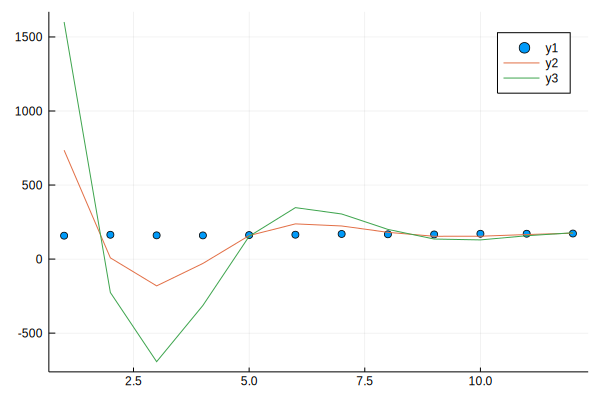

In [13]:
plot(weights, seriestype = :scatter)
plot!(e)
plot!(p)

In [17]:
x = []
for z in weights
    append!(x,z)
end

In [18]:
x

12-element Array{Any,1}:
 158.0
 164.2
 160.3
 159.9
 162.1
 164.6
 169.6
 167.4
 166.4
 171.0
 171.2
 172.6

In [2]:
13%10

3

In [3]:
-1%10

-1

In [4]:
-11%10

-1

In [5]:
(-1+10)%10

9